In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os 
os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [4]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
col_names = ["pregnant", "glucose", "bp", "skin", "insulin", "bmi", "pedigree", "age", "label"]
pima = pd.read_csv("diabetes.csv", header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
df = pima.iloc[1:,:]
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [7]:
feature_cols = ["pregnant", "glucose", "bp", "insulin", "bmi", "pedigree", "age"]
X = df[feature_cols]
y = df.label

# Bosques Aleatorios (Random Forest)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Creación de grupos de entrenamiento y prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

# Score F1 para el grupo de entrenamiento (training)

In [13]:
rf.score(X_train, y_train)

1.0

# Score F1 para el grupo de prueba (testing)

In [14]:
rf.score(X_test, y_test)

0.7987012987012987

# Estadísticas de desempeño generales

In [15]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        99
           1       0.73      0.69      0.71        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(df, model):       # esta función va a graficar la importancia de las características
    n_features = feature_cols
    plt.barh(n_features, model.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Características")
    plt.show()

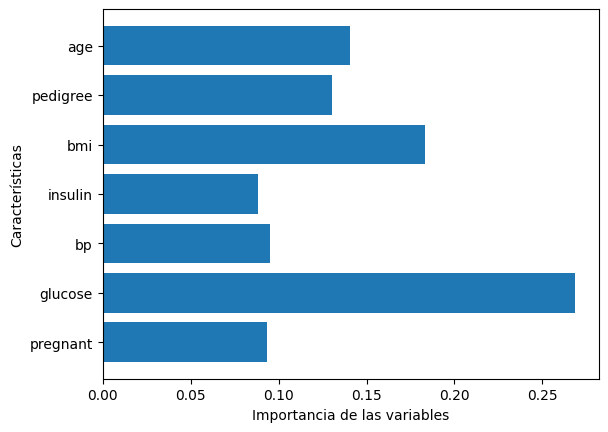

In [17]:
plot_feature_importance(df, rf)

# Gradient boosted trees (Árboles potenciados por gradiente)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Creación de grupos de entrenamiento y prueba.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state = 1)  # 100 árboles de profundidad de 3 (Default)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

# Score F1 para el grupo de entrenamiento.

In [22]:
gbt.score(X_train, y_train)

0.9104234527687296

# Score F1 para el grupo de prueba.

In [23]:
gbt.score(X_test, y_test)

0.8051948051948052

# Estadísticas de desempeño general.

In [24]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        99
           1       0.77      0.65      0.71        55

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



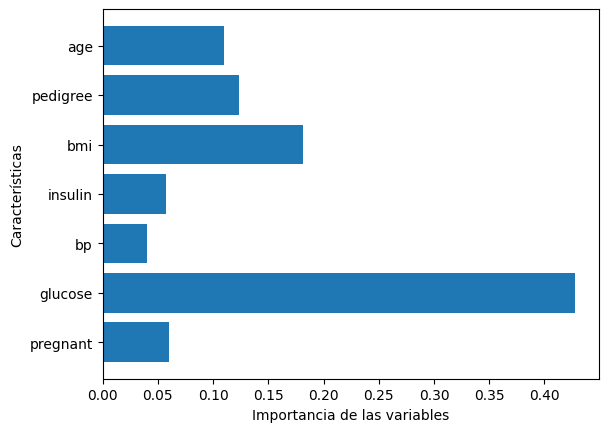

In [25]:
plot_feature_importance(df, gbt)

# Intento alternativo de Gradient Boosting 

In [26]:
gbt = GradientBoostingClassifier(n_estimators = 100, random_state = 1, max_depth = 2)
gbt.fit(X_train, y_train)
print("Training F1 Score: ,", gbt.score(X_train, y_train))
print("Testing F1 Score: ,", gbt.score(X_test, y_test))

Training F1 Score: , 0.8452768729641694
Testing F1 Score: , 0.8116883116883117


In [27]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



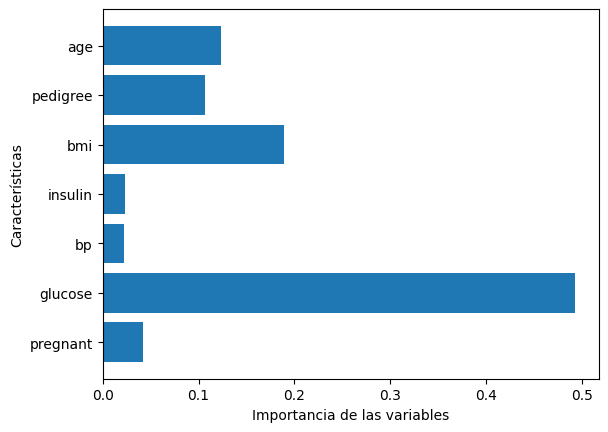

In [28]:
plot_feature_importance(df, gbt)

# AdaBoost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier

# Creación de grupos de entrenamiento y prueba.

In [31]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# AdaBoost usa árboles de decisión como clasificador por Default al momento de hacer el boosting.

In [33]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

#Entrenamiento del clasificador AdaBoost:

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        99
           1       0.71      0.67      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



# Utilización de SVM como clasificador para AdaBoost

In [35]:
from sklearn.svm import SVC

svc = SVC(probability = True, kernel = "linear")

# Creación del objeto de clasificación AdaBoost

In [36]:
abc = AdaBoostClassifier(n_estimators = 50, base_estimator = svc, learning_rate = 1)

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154

